# Predicción de precios de viviendas

En el siguiente Notebook se evaluarán distintas técnicas de Regresión para poder predecir el precio de un conjunto de viviendas residenciales en Ames, Iowa.

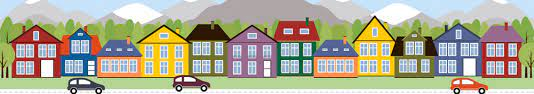

El dataset cuenta con una serie de variables que son descriptas a continuación para poder comprender cada una de ellas:
* **SalePrice:** el precio de venta de la propiedad en dólares. Esta es la variable objetivo que está tratando de predecir.
* **MSSubClass:** la clase de construcción.
* **MSZoning:** la clasificación general de zonificación.
* **LotFrontage:** pies lineales de calle conectados a la propiedad.
* **LotArea:** Tamaño del lote en pies cuadrados.
* **Street:** Tipo de acceso por carretera.
* **Alley:** Tipo de acceso al callejón.
* **LotShape:** forma general de la propiedad.
* **LandContour:** Planitud de la propiedad.
* **Utilities:** tipo de utilidades disponibles.
* **LotConfig:** configuración del lote.
* **LandSlope:** Pendiente de la propiedad.
* **Neighborhood:** Ubicaciones físicas dentro de los límites de la ciudad de Ames.
* **Condition1:** Proximidad a la carretera principal o al ferrocarril.
* **Condition2:** Proximidad a la carretera principal o al ferrocarril (si hay un segundo).
* **BldgType:** Tipo de vivienda.
* **HouseStyle:** estilo de vivienda.
* **OverallQual:** Material general y calidad de acabado.
* **OverallCond:** Calificación de estado general.
* **YearBuilt:** fecha de construcción original.
* **YearRemodAdd:** fecha de remodelación.
* **RoofStyle:** Tipo de techo.
* **RoofMatl:** material del techo.
* **Exterior1st:** Revestimiento exterior de la casa.
* **Exterior2nd:** Revestimiento exterior de la casa (si hay más de un material).
* **MasVnrType:** tipo de chapa de mampostería.
* **MasVnrArea:** Área de revestimiento de mampostería en pies cuadrados.
* **ExterQual:** Calidad del material exterior.
* **ExterCond:** Estado actual del material en el exterior.
* **Foundation:** Tipo de fundación.
* **BsmtQual:** Altura del sótano.
* **BsmtCond:** Estado general del sótano.
* **BsmtExposure:** Paredes de sótano a nivel de jardín o de salida.
* **BsmtFinType1:** Calidad del área terminada del sótano.
* **BsmtFinSF1:** pies cuadrados terminados tipo 1.
* **BsmtFinType2:** Calidad de la segunda área terminada (si está presente).
* **BsmtFinSF2:** pies cuadrados con acabado tipo 2.
* **BsmtUnfSF:** pies cuadrados sin terminar de área del sótano.
* **TotalBsmtSF:** Total de pies cuadrados de área del sótano.
* **Heating:** Tipo de calefacción.
* **HeatingQC:** calidad y estado de la calefacción.
* **CentralAir:** aire acondicionado central.
* **Electrical:** Sistema eléctrico.
* **1stFlrSF:** pies cuadrados del primer piso.
* **2ndFlrSF:** pies cuadrados del segundo piso.
* **LowQualFinSF:** pies cuadrados con acabado de baja calidad (todos los pisos).
* **GrLivArea:** pies cuadrados de área habitable sobre el nivel (suelo).
* **BsmtFullBath:** Baños completos en el sótano.
* **BsmtHalfBath:** Medios baños en el sótano.
* **FullBath:** baños completos sobre rasante.
* **HalfBath:** Medios baños sobre el nivel del suelo.
* **Bedroom:** número de dormitorios sobre el nivel del sótano.
* **Kitchen:** Número de cocinas.
* **KitchenQual:** Calidad de la cocina.
* **TotRmsAbvGrd:** Total de habitaciones sobre rasante (no incluye baños).
* **Functional:** clasificación de funcionalidad del hogar.
* **Fireplaces:** Número de chimeneas.
* **FireplaceQu:** Calidad de chimenea.
* **GarageType:** Ubicación del garaje.
* **GarageYrBlt:** año en que se construyó el garaje.
* **GarageFinish:** Acabado interior del garaje.
* **GarageCars:** Tamaño del garaje en capacidad de automóvil.
* **GarageArea:** Tamaño del garaje en pies cuadrados.
* **GarageQual:** Calidad de garaje.
* **GarageCond:** Estado del garaje.
* **PavedDrive:** entrada pavimentada.
* **WoodDeckSF:** Área de la plataforma de madera en pies cuadrados.
* **OpenPorchSF:** Área de porche abierto en pies cuadrados.
* **EnclosedPorch:** área de porche cerrado en pies cuadrados.
* **3SsnPorch:** área de porche de tres estaciones en pies cuadrados.
* **ScreenPorch:** Área del porche de la pantalla en pies cuadrados.
* **PoolArea:** Área de la piscina en pies cuadrados.
* **PoolQC:** Calidad de la piscina.
* **Fence:** calidad de la valla.
* **MiscFeature:** característica miscelánea no cubierta en otras categorías.
* **MiscVal:** $ Valor de la función miscelánea.
* **MoSold:** Mes vendido.
* **YrSold:** año vendido.
* **SaleType:** Tipo de venta.
* **SaleCondition:** Condición de venta.

In [18]:
# Liberías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

In [19]:
# Importamos datasets de entrenamiento y validación
train_data = pd.read_csv('./train.csv', index_col='Id')
test_data = pd.read_csv('./test.csv', index_col='Id')

In [20]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [22]:
# Dimensión datasets
train_data.shape, test_data.shape

((1460, 80), (1459, 79))

In [23]:
# Observamos la información de los conjuntos de datos para ver si existen valores nulos
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

Se puede observar que exiten valores que poseen una gran cantidad de valores nulos, para ello crearemos una función para ver cual es el porcentaje dentro del dataset que estos valores perdidos acumulan.

## Missing values

In [25]:
# Porcentaje de missing values en el dataset
def valores_perdidos(data):
    cuenta = (data.isnull().sum())/len(data) * 100
    cuenta = cuenta[cuenta>0].round(2)
    valores = pd.DataFrame(cuenta,  columns=['Recuento %']).sort_values(by='Recuento %', ascending=False)
    return valores 

In [26]:
valores_perdidos(train_data)

,Recuento %
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55


In [27]:
valores_perdidos(test_data)

,Recuento %
PoolQC,99.79
MiscFeature,96.50
Alley,92.67
Fence,80.12
FireplaceQu,50.03
LotFrontage,15.56
GarageCond,5.35
GarageYrBlt,5.35
GarageQual,5.35
GarageFinish,5.35


In [28]:
# Eliminamos aquellas features que tengan más del 45% de valores perdidos

train_df = train_data.drop(['FireplaceQu','Alley','PoolQC','MiscFeature','Fence'],axis=1)

test_df = test_data.drop(['FireplaceQu','Alley','PoolQC','MiscFeature','Fence'],axis=1)

In [29]:
# Conjunto reducido
train_df.shape, test_df.shape

((1460, 75), (1459, 74))

---

## Preprocesamiento de los datos

In [30]:
# Separamos la variable a predecir del conjunto de entrenamiento
y = train_df.SalePrice
train_df.drop(['SalePrice'], axis=1, inplace=True)

In [31]:
# Separamos las variables categóricas y las variables numéricas del dataset de entrenamiento
# Solo seleccionaremos las variables categóricas en donde sus valores unicos no superen a 10
columnas_categoricas= [cname for cname in train_df.columns if
                       train_df[cname].nunique() < 10 and
                       train_df[cname].dtype == 'object']

columnas_numericas = [cname for cname in train_df.columns if
                      train_df[cname].dtype in ['int64', 'float64']]

In [32]:
# Definimos los conjuntos de datos con las features filtradas
columnas_seleccionadas = columnas_categoricas + columnas_numericas
train_df = train_df[columnas_seleccionadas].copy()
test_df = test_df[columnas_seleccionadas].copy()

train_df.shape, test_df.shape

((1460, 71), (1459, 71))

In [33]:
print('Cantidad de columnas numericas: {}'.format(train_df[columnas_numericas].shape[1]))
print('Cantidad de columnas categoricas: {}'.format(train_df[columnas_categoricas].shape[1]))

Cantidad de columnas numericas: 36
Cantidad de columnas categoricas: 35


<AxesSubplot:title={'center':'Matriz de correlaciones'}>

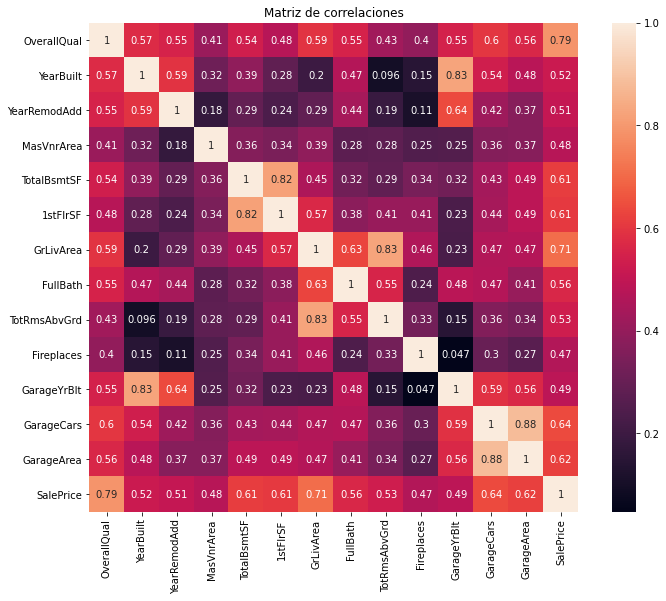

In [34]:
# Mapa de calor para ver como las features estan correlaciones con SalePrice
# Seleccionamos las features que esten correlacionadas mas de 0.45 con SalePrice
corrmat = train_data.corr()
max_corr = corrmat.index[corrmat['SalePrice'] > 0.45]
plt.subplots(figsize=(12,9))
plt.title('Matriz de correlaciones')
sns.heatmap(train_data[max_corr].corr(), annot=True, square=True)

Observamos que el material general y calidad del acabado del hogar junto con los pies cuadrados de área habitable son las variables que presentan mayor correlación con respecto al precio de la vivienda.

### Separamos el conjunto de datos en entrenamiento y validación

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df, y, test_size=0.2, random_state=0)

In [36]:
# Realizamos un pipeline para imputar la "mediana" en las columnas con variables numéricas que posean valores nulos 
# y en las columnas con variables categóricas el valor más frecuente y posteriormente realizar un OneHotEncoder 
# para poder entrenar el conjunto de datos.

imputacion_numerica = SimpleImputer(strategy='median')

imputacion_categorica = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', imputacion_numerica, columnas_numericas),
    ('cat', imputacion_categorica, columnas_categoricas)
])

## Función de ploteo

In [37]:
# Diseñamos una función para poder graficar el comportamiento de las variables predichas respecto de los valores reales
def plot_figure(train_pred, test_pred, nombre):
    plt.figure(figsize=(12,8))
    plt.scatter(train_pred, y_train, c = "blue", marker = "o", label = "Datos entrenamiento", linewidths=4)
    plt.scatter(test_pred, y_valid, c = "lightgreen", marker = "o", label = "Datos validación", linewidths=4)
    plt.title(nombre)
    plt.xlabel("Valores predichos")
    plt.ylabel("Valores reales")
    plt.legend(loc = "upper left")
    plt.grid()
    plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r-', lw=4)
    plt.show()

# Modelos

## Regresión Lineal

MAE: 23826.26
RMSE: 59544.63
R2: 0.49 %


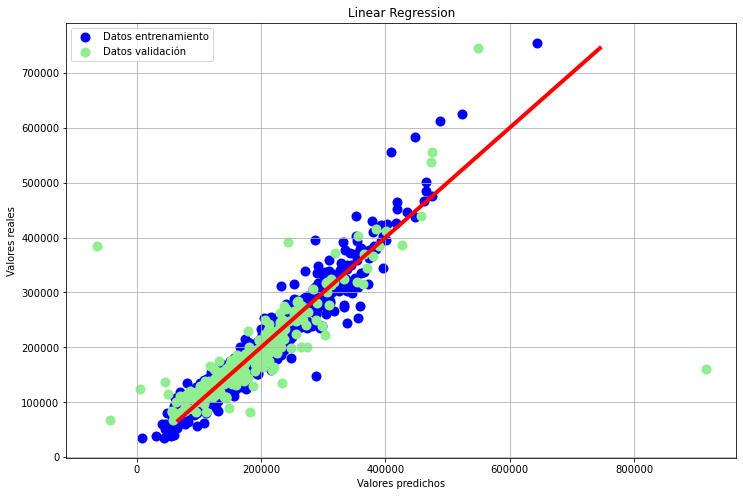

In [38]:
# Empezamos con el modelo de Regresión Lineal para ver como se comporta
lr = LinearRegression()

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', lr)
])

lr_pipeline.fit(X_train, y_train)

lr_train_predict = lr_pipeline.predict(X_train)
lr_test_predict = lr_pipeline.predict(X_valid)

# metricas
lr_mae = mean_absolute_error(y_valid, lr_test_predict)
lr_rmse = sqrt(mean_squared_error(y_valid, lr_test_predict))
lr_r2 = r2_score(y_valid, lr_test_predict)

print('MAE: {}'.format(round(lr_mae,2)))
print('RMSE: {}'.format(round(lr_rmse,2)))
print('R2: {} %'.format(round(lr_r2,2)))

plot_figure(lr_train_predict, lr_test_predict, 'Linear Regression')

## Random Forest Regressor

MAE: 23826.26
RMSE: 59544.63
R2: 0.84 %


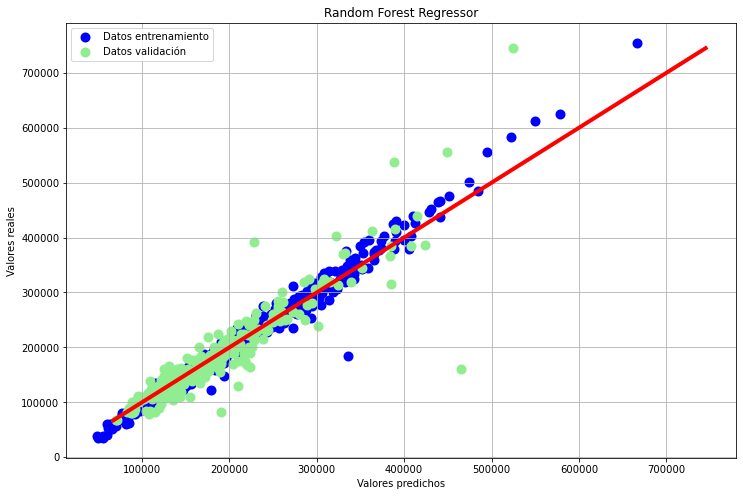

In [39]:
rf = RandomForestRegressor(n_estimators=350, random_state=0)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', rf)
])

rf_pipeline.fit(X_train, y_train)

rf_train_predict = rf_pipeline.predict(X_train)
rf_test_predict = rf_pipeline.predict(X_valid)

# metricas
rf_mae = mean_absolute_error(y_valid, lr_test_predict)
rf_rmse = sqrt(mean_squared_error(y_valid, lr_test_predict))
rf_r2 = r2_score(y_valid, rf_test_predict)

print('MAE: {}'.format(round(rf_mae,2)))
print('RMSE: {}'.format(round(rf_rmse,2)))
print('R2: {} %'.format(round(rf_r2,2)))

plot_figure(rf_train_predict, rf_test_predict, 'Random Forest Regressor')

## XGBoost Regressor

MAE: 16679.18
RMSE: 31560.14
R2: 0.86 %


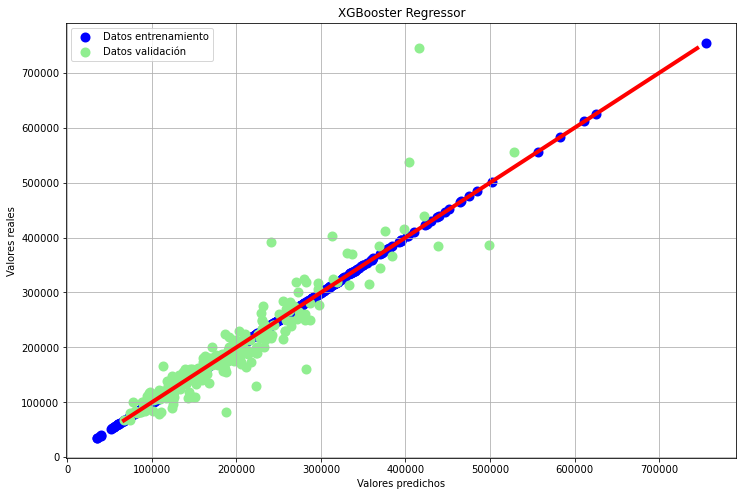

In [40]:
xgboost = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=0)

xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', xgboost)
])

xgboost_pipeline.fit(X_train, y_train)

xgboost_train_predict = xgboost_pipeline.predict(X_train)
xgboost_test_predict = xgboost_pipeline.predict(X_valid)

# metricas
xgboost_mae = mean_absolute_error(y_valid, xgboost_test_predict)
xgboost_rmse = sqrt(mean_squared_error(y_valid, xgboost_test_predict))
xgboost_r2 = r2_score(y_valid, xgboost_test_predict)

print('MAE: {}'.format(round(xgboost_mae,2)))
print('RMSE: {}'.format(round(xgboost_rmse,2)))
print('R2: {} %'.format(round(xgboost_r2,2)))

plot_figure(xgboost_train_predict, xgboost_test_predict, 'XGBooster Regressor')

Realizamos un análisis simplificado para estudiar el comportamiento de las variables según el precio de venta de las viviendas. Puede seguir profundizandose más en las distintas variables para ver como se comportan en los modelos.
En este caso, cargaremos los datos con el modelo de XGBooster.

## Submission

In [41]:
# Predicimos los valores del conjunto de validación con el modelo planteado
y_pred = xgboost_pipeline.predict(test_df)

submission = pd.DataFrame()
submission['Id'] = test_df.index
submission['SalePrice'] = y_pred
submission

,Id,SalePrice
0,1461,124586.328125
1,1462,158150.703125
2,1463,190692.234375
3,1464,194460.500000
4,1465,195245.515625
...,...,...
1454,2915,77236.640625
1455,2916,79831.156250
1456,2917,170030.890625
1457,2918,113584.695312


---